In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
feeling_words = pd.read_csv('../data/feeling_words.csv')

In [3]:
twitter_tweets = pd.read_csv('../data/twitter_tweets', engine='python')

### Checking out the dataframes 👀

In [4]:
feeling_words.head()

words sub_category main_category
0  drawn toward         love      pleasant
1       playful        alive      pleasant
2        frisky        alive      pleasant
3         weary  indifferent    unpleasant
4      offended         hurt    unpleasant

In [5]:
feeling_words.tail()

words  sub_category main_category
235  dissatisfied     depressed    unpleasant
236      hesitant      confused    unpleasant
237     receptive          open      pleasant
238   pessimistic  confused/sad    unpleasant
239        secure        strong      pleasant

In [6]:
feeling_words.shape

(240, 3)

In [7]:
feeling_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   words          240 non-null    object
 1   sub_category   240 non-null    object
 2   main_category  240 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


In [8]:
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  @Sportyfreak2005 ISL played an huge role in de...            0.0   
1  @O_ssai @AyoOyalowo Was having a conversation ...            0.0   
2  @Aventonio @GoonerJel_LDN To us it will mean w...            0.0   
3  Money stop nonsense is the main reason why mos...            1.0   
4  Watching PMs speech right now and honestly it'...            2.0   

   reply_count like_count quote_count        date           time  
0          0.0          1           0  2021-04-19  12:29:59.000Z  
1          1.0          7           0  2021-04-19  12:29:59.000Z  
2          0.0          1           0  2021-04-19  12:29:59.000Z  
3          0.0          2           0  2021-04-19  12:29:59.000Z  
4          0.0          2           0  2021-04-19  12:29:59.000Z

In [9]:
twitter_tweets.tail()

id                created_at  \
25007  1384121583128571912  2021-04-19T12:27:55.000Z   
25008  1384121583124434944  2021-04-19T12:27:55.000Z   
25009  1384121583053144066  2021-04-19T12:27:55.000Z   
25010  1384121583015317514  2021-04-19T12:27:55.000Z   
25011  1384121582994432011  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
25007  Beware the fallout of America’s exit from Afgh...            0.0   
25008  In MyinGyan, there are 4 death,4 in critical c...            0.0   
25009  no motherfucker if YOU want to MAKE a sequel, ...            0.0   
25010  Way past his 15 minutes of fame. https://t.co/...            0.0   
25011  Wednesday to the moon 🌝🚀 #Safemoon https://t.c...            9.0   

       reply_count like_count quote_count        date           time  
25007          0.0          0           0  2021-04-19  12:27:55.000Z  
25008          0.0          0           0  2021-04-19  12:27:55.000Z  
25009          0.0          0           0  2021-04-19  12:27:55.000Z  
25010          0.0          0           0  2021-04-19  12:27:55.000Z  
25011          1.0         26           0  2021-04-19  12:27:55.000Z

In [10]:
twitter_tweets.shape

(25012, 9)

In [11]:
twitter_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25012 entries, 0 to 25011
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25012 non-null  object 
 1   created_at     25011 non-null  object 
 2   text           25011 non-null  object 
 3   retweet_count  25010 non-null  float64
 4   reply_count    25010 non-null  float64
 5   like_count     25010 non-null  object 
 6   quote_count    25010 non-null  object 
 7   date           25009 non-null  object 
 8   time           25009 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.7+ MB


In [12]:
twitter_tweets.isnull().sum()

id               0
created_at       1
text             1
retweet_count    2
reply_count      2
like_count       2
quote_count      2
date             3
time             3
dtype: int64

### Looking for the rows with NaN values 🤨

In [13]:
nan_value = twitter_tweets.isnull()
row_nan = nan_value.any(axis=1)
rows_with_nan = twitter_tweets[row_nan]
rows_with_nan

id                created_at  \
2752        1384122047689728004  2021-04-19T12:29:46.000Z   
2753  Join me on Travel Trivia!                      None   
2754    https://t.co/SywEbpPDYk                         0   

                                                   text  retweet_count  \
2752  What state is home to an area known as the Res...            NaN   
2753                                               None            NaN   
2754                                                  0            0.0   

      reply_count  like_count    quote_count  date  time  
2752          NaN        None           None  None  None  
2753          NaN        None           None  None  None  
2754          0.0  2021-04-19  12:29:46.000Z  None  None

#### A row in the dataframe was parsed incorrectly into three rows of gibberish  👁 👄 👁
Checking out where the parse went wrong 😅

In [14]:
twitter_tweets.text[2752]

'What state is home to an area known as the Research Triangle? '

In [15]:
twitter_tweets.id[2753]

'Join me on Travel Trivia!'

In [16]:
twitter_tweets.id[2754]

' https://t.co/SywEbpPDYk'

In [17]:
#replacing the value in the text column for index 2752.
twitter_tweets.loc[(twitter_tweets.text == 'What state is home to an area known as the Research Triangle? '),'text']='What state is home to an area known as the Research Triangle? Join me on Travel Trivia! https://t.co/SywEbpPDYk'

In [18]:
twitter_tweets.text[2752]

'What state is home to an area known as the Research Triangle? Join me on Travel Trivia! https://t.co/SywEbpPDYk'

In [19]:
twitter_tweets.loc[(twitter_tweets['date'] == 'None'),'date'] = '2021-04-19'

In [20]:
print(type(twitter_tweets['date'][2752]))

<class 'NoneType'>


👁 👄 👁 .. 何

#### Changing the NoneType to a str...Noticed other columns with the NoneType as well.

In [21]:
date_list = ['None' if v is None else v for v in twitter_tweets['date']]

In [22]:
#checking for the change. Correct! Three values in the date column are null.
date_list.count('None')

3

In [23]:
twitter_tweets[['date']] = date_list

In [24]:
twitter_tweets['date'][2752]

'None'

#### Let's change all the columns with NoneType values!

In [25]:
like_count_list = ['None' if v is None else v for v in twitter_tweets['like_count']]

In [26]:
quote_count_list = ['None' if v is None else v for v in twitter_tweets['quote_count']]

In [27]:
time_list = ['None' if v is None else v for v in twitter_tweets['time']]

In [28]:
like_count_list.count('None')

2

In [29]:
quote_count_list.count('None')

2

In [30]:
time_list.count('None')

3

#### Change the columns like_count, quote_count, & time_list  🔮

In [31]:
twitter_tweets[['like_count']] = like_count_list

In [32]:
twitter_tweets[['quote_count']] = quote_count_list

In [33]:
twitter_tweets[['time']] = time_list

#### Back to replacing values in row 2752.

In [34]:
twitter_tweets.loc[(twitter_tweets['date'] == 'None'),'date'] = '2021-04-19'

In [35]:
twitter_tweets['date'][2752]

'2021-04-19'

In [36]:
twitter_tweets.loc[(twitter_tweets['time'] == 'None'),'time'] = '12:29:46.000Z'

In [37]:
twitter_tweets['time'][2752]

'12:29:46.000Z'

In [38]:
twitter_tweets.loc[(twitter_tweets['like_count'] == 'None'),'like_count'] = 0

In [39]:
twitter_tweets['like_count'][2752]

0

In [40]:
twitter_tweets.loc[(twitter_tweets['quote_count'] == 'None'),'quote_count'] = 0

In [41]:
twitter_tweets['quote_count'][2752]

0

In [42]:
twitter_tweets[['retweet_count','reply_count']] = twitter_tweets[['retweet_count','reply_count']].fillna(0)

In [43]:
twitter_tweets['retweet_count'][2752]

0.0

In [44]:
twitter_tweets['reply_count'][2752]

0.0

#### Perfect! the changes worked! Time to drop the unwanted rows ✂️

In [45]:
twitter_tweets = twitter_tweets.drop(twitter_tweets.index[[2753,2754]])

In [46]:
twitter_tweets.shape

(25010, 9)

#### Convert datatype for retweet_count & reply_count column.

In [47]:
convert_types = {
    'retweet_count':int,
    'reply_count':int,
    'like_count':int,
    'quote_count':int,
    'time':str
}

In [48]:
twitter_tweets = twitter_tweets.astype(convert_types)
twitter_tweets

id                created_at  \
0      1384122103977316355  2021-04-19T12:29:59.000Z   
1      1384122103918596098  2021-04-19T12:29:59.000Z   
2      1384122103897546760  2021-04-19T12:29:59.000Z   
3      1384122103876648967  2021-04-19T12:29:59.000Z   
4      1384122103863996422  2021-04-19T12:29:59.000Z   
...                    ...                       ...   
25007  1384121583128571912  2021-04-19T12:27:55.000Z   
25008  1384121583124434944  2021-04-19T12:27:55.000Z   
25009  1384121583053144066  2021-04-19T12:27:55.000Z   
25010  1384121583015317514  2021-04-19T12:27:55.000Z   
25011  1384121582994432011  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
0      @Sportyfreak2005 ISL played an huge role in de...              0   
1      @O_ssai @AyoOyalowo Was having a conversation ...              0   
2      @Aventonio @GoonerJel_LDN To us it will mean w...              0   
3      Money stop nonsense is the main reason why mos...              1   
4      Watching PMs speech right now and honestly it'...              2   
...                                                  ...            ...   
25007  Beware the fallout of America’s exit from Afgh...              0   
25008  In MyinGyan, there are 4 death,4 in critical c...              0   
25009  no motherfucker if YOU want to MAKE a sequel, ...              0   
25010  Way past his 15 minutes of fame. https://t.co/...              0   
25011  Wednesday to the moon 🌝🚀 #Safemoon https://t.c...              9   

       reply_count  like_count  quote_count        date           time  
0                0           1            0  2021-04-19  12:29:59.000Z  
1                1           7            0  2021-04-19  12:29:59.000Z  
2                0           1            0  2021-04-19  12:29:59.000Z  
3                0           2            0  2021-04-19  12:29:59.000Z  
4                0           2            0  2021-04-19  12:29:59.000Z  
...            ...         ...          ...         ...            ...  
25007            0           0            0  2021-04-19  12:27:55.000Z  
25008            0           0            0  2021-04-19  12:27:55.000Z  
25009            0           0            0  2021-04-19  12:27:55.000Z  
25010            0           0            0  2021-04-19  12:27:55.000Z  
25011            1          26            0  2021-04-19  12:27:55.000Z  

[25010 rows x 9 columns]

In [49]:
#taking out the extra zeros and the Z
twitter_tweets['time'] = twitter_tweets['time'].str.split('.').str[0]

In [50]:
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  @Sportyfreak2005 ISL played an huge role in de...              0   

   reply_count  like_count  quote_count        date      time  
0            0           1            0  2021-04-19  12:29:59

In [51]:
twitter_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25010 entries, 0 to 25011
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             25010 non-null  object
 1   created_at     25010 non-null  object
 2   text           25010 non-null  object
 3   retweet_count  25010 non-null  int64 
 4   reply_count    25010 non-null  int64 
 5   like_count     25010 non-null  int64 
 6   quote_count    25010 non-null  int64 
 7   date           25010 non-null  object
 8   time           25010 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.9+ MB


**Save the newly cleaned Twitter tweets dataframe to a csv**  💾

In [52]:
twitter_tweets.to_csv(path_or_buf = '../data/cleaned_twitter_tweets.csv',index=False)

In [53]:
#make the text column values lowercase before creating a new column with all the word matches.
twitter_tweets['text'] = twitter_tweets['text'].str.lower()

In [54]:
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  @sportyfreak2005 isl played an huge role in de...              0   
1  @o_ssai @ayooyalowo was having a conversation ...              0   
2  @aventonio @goonerjel_ldn to us it will mean w...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly it'...              2   

   reply_count  like_count  quote_count        date      time  
0            0           1            0  2021-04-19  12:29:59  
1            1           7            0  2021-04-19  12:29:59  
2            0           1            0  2021-04-19  12:29:59  
3            0           2            0  2021-04-19  12:29:59  
4            0           2            0  2021-04-19  12:29:59

In [55]:
#first step in matching words
pattern = "|".join(f"\w*(?<![A-Za-z-;:,/|]){i}\\b" for i in feeling_words['words'])

In [56]:
#second step in matching words
twitter_tweets['words'] = twitter_tweets['text'].str.findall(pattern)

In [57]:
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  @sportyfreak2005 isl played an huge role in de...              0   
1  @o_ssai @ayooyalowo was having a conversation ...              0   
2  @aventonio @goonerjel_ldn to us it will mean w...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly it'...              2   

   reply_count  like_count  quote_count        date      time     words  
0            0           1            0  2021-04-19  12:29:59        []  
1            1           7            0  2021-04-19  12:29:59   [alone]  
2            0           1            0  2021-04-19  12:29:59        []  
3            0           2            0  2021-04-19  12:29:59        []  
4            0           2            0  2021-04-19  12:29:59  [forced]

In [58]:
twitter_tweets.tail()

id                created_at  \
25007  1384121583128571912  2021-04-19T12:27:55.000Z   
25008  1384121583124434944  2021-04-19T12:27:55.000Z   
25009  1384121583053144066  2021-04-19T12:27:55.000Z   
25010  1384121583015317514  2021-04-19T12:27:55.000Z   
25011  1384121582994432011  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
25007  beware the fallout of america’s exit from afgh...              0   
25008  in myingyan, there are 4 death,4 in critical c...              0   
25009  no motherfucker if you want to make a sequel, ...              0   
25010  way past his 15 minutes of fame. https://t.co/...              0   
25011  wednesday to the moon 🌝🚀 #safemoon https://t.c...              9   

       reply_count  like_count  quote_count        date      time words  
25007            0           0            0  2021-04-19  12:27:55    []  
25008            0           0            0  2021-04-19  12:27:55    []  
25009            0           0            0  2021-04-19  12:27:55    []  
25010            0           0            0  2021-04-19  12:27:55    []  
25011            1          26            0  2021-04-19  12:27:55    []

In [59]:
#changing the empty list values.
twitter_tweets['words'] = twitter_tweets['words'].apply(lambda w: 'no match' if len(w)== 0 else ','.join(w))

In [60]:
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  @sportyfreak2005 isl played an huge role in de...              0   
1  @o_ssai @ayooyalowo was having a conversation ...              0   
2  @aventonio @goonerjel_ldn to us it will mean w...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly it'...              2   

   reply_count  like_count  quote_count        date      time     words  
0            0           1            0  2021-04-19  12:29:59  no match  
1            1           7            0  2021-04-19  12:29:59     alone  
2            0           1            0  2021-04-19  12:29:59  no match  
3            0           2            0  2021-04-19  12:29:59  no match  
4            0           2            0  2021-04-19  12:29:59    forced

In [61]:
twitter_tweets.tail()

id                created_at  \
25007  1384121583128571912  2021-04-19T12:27:55.000Z   
25008  1384121583124434944  2021-04-19T12:27:55.000Z   
25009  1384121583053144066  2021-04-19T12:27:55.000Z   
25010  1384121583015317514  2021-04-19T12:27:55.000Z   
25011  1384121582994432011  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
25007  beware the fallout of america’s exit from afgh...              0   
25008  in myingyan, there are 4 death,4 in critical c...              0   
25009  no motherfucker if you want to make a sequel, ...              0   
25010  way past his 15 minutes of fame. https://t.co/...              0   
25011  wednesday to the moon 🌝🚀 #safemoon https://t.c...              9   

       reply_count  like_count  quote_count        date      time     words  
25007            0           0            0  2021-04-19  12:27:55  no match  
25008            0           0            0  2021-04-19  12:27:55  no match  
25009            0           0            0  2021-04-19  12:27:55  no match  
25010            0           0            0  2021-04-19  12:27:55  no match  
25011            1          26            0  2021-04-19  12:27:55  no match

#### Cleaning up the tweet text.

In [62]:
#removing links from tweets in the text column and replacing with a space
twitter_tweets['text'] = twitter_tweets['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [63]:
#checking a known row that had a link. Perfect!
twitter_tweets['text'][9]

'military terrorists abducted 6 volunteers of a charity clinic &amp; also confiscated their ambulance on apr 11 night in mandalay. now they were seen using that ambulance to abduct protesters.\n#apr19coup\n#crimesagainsthumanity\n#whatshappeninginmyanmar '

In [64]:
#replace \n with an empty string
twitter_tweets['text'] = twitter_tweets['text'].replace('\n','', regex=True)

In [65]:
#checking a known row that had \n. Perfect!
twitter_tweets['text'][9]

'military terrorists abducted 6 volunteers of a charity clinic &amp; also confiscated their ambulance on apr 11 night in mandalay. now they were seen using that ambulance to abduct protesters.#apr19coup#crimesagainsthumanity#whatshappeninginmyanmar '

In [66]:
#removing and replacing multiple punctuation marks
twitter_tweets['text'] = twitter_tweets['text'].apply(lambda t: re.sub(r"[#!,@\'?\.$%_]",  "", str(t)))
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was having a conversation wit...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  
0            0           1            0  2021-04-19  12:29:59  no match  
1            1           7            0  2021-04-19  12:29:59     alone  
2            0           1            0  2021-04-19  12:29:59  no match  
3            0           2            0  2021-04-19  12:29:59  no match  
4            0           2            0  2021-04-19  12:29:59    forced

In [67]:
#checking a single tweet for changes
twitter_tweets['text'][0]

'sportyfreak2005 isl played an huge role in developing of football in india &amp; bringing up fan accorss india but the case in european super league is completely different  its just the e matter of greediness'

In [68]:
#removing and replacing single characters
twitter_tweets['text'] = twitter_tweets['text'].apply(lambda z: re.sub(r"\s+[a-zA-Z]\s+",  "", str(z)))
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was havingconversation withca...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  
0            0           1            0  2021-04-19  12:29:59  no match  
1            1           7            0  2021-04-19  12:29:59     alone  
2            0           1            0  2021-04-19  12:29:59  no match  
3            0           2            0  2021-04-19  12:29:59  no match  
4            0           2            0  2021-04-19  12:29:59    forced

In [69]:
#checking a single tweet for changes
twitter_tweets['text'][0]

'sportyfreak2005 isl played an huge role in developing of football in india &amp; bringing up fan accorss india but the case in european super league is completely different  its just thematter of greediness'

In [70]:
#removing leading and trailing spaces from beginning and ending of string
twitter_tweets['text'] = twitter_tweets['text'].str.strip()
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was havingconversation withca...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  
0            0           1            0  2021-04-19  12:29:59  no match  
1            1           7            0  2021-04-19  12:29:59     alone  
2            0           1            0  2021-04-19  12:29:59  no match  
3            0           2            0  2021-04-19  12:29:59  no match  
4            0           2            0  2021-04-19  12:29:59    forced

In [71]:
twitter_tweets['text_count'] = twitter_tweets['text'].str.count(' ') + 1
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was havingconversation withca...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   
1            1           7            0  2021-04-19  12:29:59     alone   
2            0           1            0  2021-04-19  12:29:59  no match   
3            0           2            0  2021-04-19  12:29:59  no match   
4            0           2            0  2021-04-19  12:29:59    forced   

   text_count  
0          34  
1          35  
2          47  
3          18  
4          38

In [72]:
twitter_tweets['text'][9]

'military terrorists abducted 6 volunteers ofcharity clinic &amp; also confiscated their ambulance on apr 11 night in mandalay now they were seen using that ambulance to abduct protestersapr19coupcrimesagainsthumanitywhatshappeninginmyanmar'

In [73]:
twitter_tweets['words'].value_counts()

no match                                           20936
great                                                411
interested                                           352
sure                                                 234
bad                                                  203
                                                   ...  
disgusting,disgusting                                  1
relaxed,playful                                        1
free,loved                                             1
encouraged,worried,certain,encouraged,confident        1
upset,loved                                            1
Name: words, Length: 510, dtype: int64

#### Many sub_category lists 💀

In [74]:
open_list = ['understanding', 'confident', 'reliable', 'easy', 'amazed', 'free', 'sympathetic', 'interested', 'satisfied', 'receptive', 'accepting', 'kind']
happy_list = ['great', 'gay', 'joyous', 'lucky', 'fortunate', 'delighted', 'overjoyed', 'gleeful', 'thankful', 'important', 'festive', 'ecstatic', 'satisfied', 'glad', 'cheerful', 'sunny', 'merry', 'elated', 'jubilant']
alive_list = ['playful', 'courageous', 'energetic', 'liberated', 'optimistic', 'provocative', 'impulsive', 'free', 'frisky', 'animated', 'spirited', 'thrilled', 'wonderful']
good_list = ['calm', 'peaceful', 'at ease', 'comfortable', 'pleased', 'encouraged', 'clever', 'surprised', 'content', 'quiet', 'relaxed', 'serene', 'free and easy', 'bright', 'blessed', 'reassured']
love_list = ['loving', 'considerate', 'affectionate', 'sensitive', 'tender', 'devoted', 'attracted', 'passionate', 'admiration', 'warm', 'touched', 'sympathy', 'close', 'loved', 'comforted', 'drawn toward']
interested_list = ['concerned', 'affected', 'fascinated', 'intrigued', 'absorbed', 'inquisitive', 'nosy', 'snoopy', 'engrossed', 'curious']
positive_list = ['eager', 'keen', 'earnest', 'intent', 'anxious', 'inspired', 'determined', 'excited', 'enthusiastic', 'bold', 'brave', 'daring', 'challenged', 'optimistic', 're-enforced', 'confident', 'hopeful']
strong_list = ['impulsive', 'free', 'sure', 'certain', 'rebellious', 'unique', 'dynamic', 'tenacious', 'hardy', 'secure']
angry_list = ['irritated', 'enraged', 'hostile', 'insulting', 'sore', 'annoyed', 'upset', 'hateful', 'unpleasant', 'offensive', 'bitter', 'aggressive', 'resentful', 'inflamed', 'provoked', 'incensed', 'infuriated', 'cross', 'worked up', 'boiling', 'fuming', 'indignant']
depressed_list = ['lousy', 'disappointed', 'discouraged', 'ashamed', 'powerless', 'diminished', 'guilty', 'dissatisfied', 'miserable', 'detestable', 'repugnant', 'despicable', 'disgusting', 'abominable', 'terrible', 'in despair', 'sulky', 'bad', 'a sense of loss']
confused_list = ['upset', 'doubtful', 'uncertain', 'indecisive', 'perplexed', 'embarrassed', 'hesitant', 'shy', 'stupefied', 'disillusioned', 'unbelieving', 'skeptical', 'distrustful', 'misgiving', 'lost', 'unsure', 'uneasy', 'pessimistic', 'tense']
helpless_list = ['incapable', 'alone', 'paralyzed', 'fatigued', 'useless', 'inferior', 'vulnerable', 'empty', 'forced', 'hesitant', 'despair', 'frustrated', 'distressed', 'woeful', 'pathetic', 'tragic', 'in a stew', 'dominated']
indifferent_list = ['insensitive', 'dull', 'nonchalant', 'neutral', 'reserved', 'weary', 'bored', 'preoccupied', 'cold', 'disinterested', 'lifeless']
afraid_list = ['fearful', 'terrified', 'suspicious', 'anxious', 'alarmed', 'panic', 'nervous', 'scared', 'worried', 'frightened', 'timid', 'shaky', 'restless', 'doubtful', 'threatened', 'cowardly', 'quaking', 'menaced', 'wary']
hurt_list = ['crushed', 'tormented', 'deprived', 'pained', 'tortured', 'dejected', 'rejected', 'injured', 'offended', 'afflicted', 'aching', 'victimized', 'heartbroken', 'agonized', 'appalled', 'humiliated', 'wronged', 'alienated']
sad_list = ['tearful', 'sorrowful', 'pained', 'grief', 'anguish', 'desolate', 'desperate', 'pessimistic', 'unhappy', 'lonely', 'grieved', 'mournful', 'dismayed']

In [75]:
sub_category_list = []
for word in twitter_tweets['words']:
    if word in open_list:
        feeling = 'open'
        sub_category_list.append(feeling)
    elif word in happy_list:
        feeling = 'happy'
        sub_category_list.append(feeling)
    elif word in alive_list:
        feeling = 'alive'
        sub_category_list.append(feeling)
    elif word in good_list:
        feeling = 'good'
        sub_category_list.append(feeling)
    elif word in love_list:
        feeling = 'love'
        sub_category_list.append(feeling)
    elif word in interested_list:
        feeling = 'interested'
        sub_category_list.append(feeling)
    elif word in positive_list:
        feeling = 'positive'
        sub_category_list.append(feeling)
    elif word in strong_list:
        feeling = 'strong'
        sub_category_list.append(feeling)
    elif word in angry_list:
        feeling = 'angry'
        sub_category_list.append(feeling)
    elif word in depressed_list:
        feeling = 'depressed'
        sub_category_list.append(feeling)
    elif word in confused_list:
        feeling = 'confused'
        sub_category_list.append(feeling)
    elif word in helpless_list:
        feeling = 'helpless'
        sub_category_list.append(feeling)
    elif word in indifferent_list:
        feeling = 'indifferent'
        sub_category_list.append(feeling)
    elif word in afraid_list:
        feeling = 'afraid'
        sub_category_list.append(feeling)
    elif word in hurt_list:
        feeling = 'hurt'
        sub_category_list.append(feeling)
    elif word in sad_list:
        feeling = 'sad'
        sub_category_list.append(feeling)
    elif word == 'no match':
        feeling = 'neutral'
        sub_category_list.append(feeling)
    else:
        sub_category_list.append('multiple feelings')      

In [76]:
#Checking out the list for the new sub_category column!
#sub_category_list

In [77]:
twitter_tweets['sub_category'] = sub_category_list
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was havingconversation withca...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   
1            1           7            0  2021-04-19  12:29:59     alone   
2            0           1            0  2021-04-19  12:29:59  no match   
3            0           2            0  2021-04-19  12:29:59  no match   
4            0           2            0  2021-04-19  12:29:59    forced   

   text_count sub_category  
0          34      neutral  
1          35     helpless  
2          47      neutral  
3          18      neutral  
4          38     helpless

In [78]:
twitter_tweets.tail()

id                created_at  \
25007  1384121583128571912  2021-04-19T12:27:55.000Z   
25008  1384121583124434944  2021-04-19T12:27:55.000Z   
25009  1384121583053144066  2021-04-19T12:27:55.000Z   
25010  1384121583015317514  2021-04-19T12:27:55.000Z   
25011  1384121582994432011  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
25007  beware the fallout of america’s exit from afgh...              0   
25008  in myingyan there are 4 death4 in critical con...              0   
25009  no motherfucker if you want to makesequel make...              0   
25010                    way past his 15 minutes of fame              0   
25011                  wednesday to the moon 🌝🚀 safemoon              9   

       reply_count  like_count  quote_count        date      time     words  \
25007            0           0            0  2021-04-19  12:27:55  no match   
25008            0           0            0  2021-04-19  12:27:55  no match   
25009            0           0            0  2021-04-19  12:27:55  no match   
25010            0           0            0  2021-04-19  12:27:55  no match   
25011            1          26            0  2021-04-19  12:27:55  no match   

       text_count sub_category  
25007           8      neutral  
25008          34      neutral  
25009          11      neutral  
25010           7      neutral  
25011           6      neutral

#### Create main category column

In [79]:
main_category_list = []
for words in twitter_tweets['words']:
    if words in open_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in happy_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in alive_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in good_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in love_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in interested_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in positive_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in strong_list:
        feelings = 'pleasant'
        main_category_list.append(feelings)
    elif words in angry_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words in depressed_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words in confused_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words in helpless_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words in indifferent_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words in afraid_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words in hurt_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words in sad_list:
        feelings = 'difficult'
        main_category_list.append(feelings)
    elif words == 'no match':
        feelings = 'neutral'
        main_category_list.append(feelings)
    else:
        feelings = 'multiple feelings'
        main_category_list.append(feelings)

In [80]:
twitter_tweets['main_category'] = main_category_list
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was havingconversation withca...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   
1            1           7            0  2021-04-19  12:29:59     alone   
2            0           1            0  2021-04-19  12:29:59  no match   
3            0           2            0  2021-04-19  12:29:59  no match   
4            0           2            0  2021-04-19  12:29:59    forced   

   text_count sub_category main_category  
0          34      neutral       neutral  
1          35     helpless     difficult  
2          47      neutral       neutral  
3          18      neutral       neutral  
4          38     helpless     difficult

In [81]:
twitter_tweets.tail()

id                created_at  \
25007  1384121583128571912  2021-04-19T12:27:55.000Z   
25008  1384121583124434944  2021-04-19T12:27:55.000Z   
25009  1384121583053144066  2021-04-19T12:27:55.000Z   
25010  1384121583015317514  2021-04-19T12:27:55.000Z   
25011  1384121582994432011  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
25007  beware the fallout of america’s exit from afgh...              0   
25008  in myingyan there are 4 death4 in critical con...              0   
25009  no motherfucker if you want to makesequel make...              0   
25010                    way past his 15 minutes of fame              0   
25011                  wednesday to the moon 🌝🚀 safemoon              9   

       reply_count  like_count  quote_count        date      time     words  \
25007            0           0            0  2021-04-19  12:27:55  no match   
25008            0           0            0  2021-04-19  12:27:55  no match   
25009            0           0            0  2021-04-19  12:27:55  no match   
25010            0           0            0  2021-04-19  12:27:55  no match   
25011            1          26            0  2021-04-19  12:27:55  no match   

       text_count sub_category main_category  
25007           8      neutral       neutral  
25008          34      neutral       neutral  
25009          11      neutral       neutral  
25010           7      neutral       neutral  
25011           6      neutral       neutral

### Creating individual sub_category columns for counts 🧮

In [82]:
#Counting 1 when the parameter's argument is met and 0 when not while looping through the sub_category column
count_list = []
def sub_counter(word):
    for c in twitter_tweets['sub_category']:
        if c in word:
            count_list.append(1)
        else:
            count_list.append(0)

In [83]:
sub_counter('good')

In [84]:
twitter_tweets['good_count'] = count_list

In [85]:
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was havingconversation withca...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   
1            1           7            0  2021-04-19  12:29:59     alone   
2            0           1            0  2021-04-19  12:29:59  no match   
3            0           2            0  2021-04-19  12:29:59  no match   
4            0           2            0  2021-04-19  12:29:59    forced   

   text_count sub_category main_category  good_count  
0          34      neutral       neutral           0  
1          35     helpless     difficult           0  
2          47      neutral       neutral           0  
3          18      neutral       neutral           0  
4          38     helpless     difficult           0

In [86]:
count_list = []
sub_counter('open')
twitter_tweets['open_count'] = count_list
twitter_tweets.head()

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   
1  1384122103918596098  2021-04-19T12:29:59.000Z   
2  1384122103897546760  2021-04-19T12:29:59.000Z   
3  1384122103876648967  2021-04-19T12:29:59.000Z   
4  1384122103863996422  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   
1  ossai ayooyalowo was havingconversation withca...              0   
2  aventonio goonerjelldn to us it will mean we c...              0   
3  money stop nonsense is the main reason why mos...              1   
4  watching pms speech right now and honestly its...              2   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   
1            1           7            0  2021-04-19  12:29:59     alone   
2            0           1            0  2021-04-19  12:29:59  no match   
3            0           2            0  2021-04-19  12:29:59  no match   
4            0           2            0  2021-04-19  12:29:59    forced   

   text_count sub_category main_category  good_count  open_count  
0          34      neutral       neutral           0           0  
1          35     helpless     difficult           0           0  
2          47      neutral       neutral           0           0  
3          18      neutral       neutral           0           0  
4          38     helpless     difficult           0           0

In [87]:
count_list = []
sub_counter('happy')
twitter_tweets['happy_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   

   text_count sub_category main_category  good_count  open_count  happy_count  
0          34      neutral       neutral           0           0            0

In [88]:
count_list = []
sub_counter('alive')
twitter_tweets['alive_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   

   text_count sub_category main_category  good_count  open_count  happy_count  \
0          34      neutral       neutral           0           0            0   

   alive_count  
0            0

In [89]:
count_list = []
sub_counter('love')
twitter_tweets['love_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   

   text_count sub_category main_category  good_count  open_count  happy_count  \
0          34      neutral       neutral           0           0            0   

   alive_count  love_count  
0            0           0

In [90]:
count_list = []
sub_counter('interested')
twitter_tweets['interested_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   

   text_count sub_category main_category  good_count  open_count  happy_count  \
0          34      neutral       neutral           0           0            0   

   alive_count  love_count  interested_count  
0            0           0                 0

In [91]:
count_list = []
sub_counter('positive')
twitter_tweets['positive_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  \
0            0           1            0  2021-04-19  12:29:59  no match   

   text_count sub_category main_category  good_count  open_count  happy_count  \
0          34      neutral       neutral           0           0            0   

   alive_count  love_count  interested_count  positive_count  
0            0           0                 0               0

In [92]:
count_list = []
sub_counter('strong')
twitter_tweets['strong_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   sub_category main_category good_count  open_count  happy_count  \
0       neutral       neutral          0           0            0   

   alive_count  love_count  interested_count  positive_count  strong_count  
0            0           0                 0               0             0  

[1 rows x 21 columns]

In [93]:
count_list = []
sub_counter('angry')
twitter_tweets['angry_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   main_category good_count open_count  happy_count  alive_count  love_count  \
0        neutral          0          0            0            0           0   

   interested_count  positive_count  strong_count  angry_count  
0                 0               0             0            0  

[1 rows x 22 columns]

In [94]:
count_list = []
sub_counter('depressed')
twitter_tweets['depressed_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   good_count open_count happy_count  alive_count  love_count  \
0           0          0           0            0           0   

   interested_count  positive_count  strong_count  angry_count  \
0                 0               0             0            0   

   depressed_count  
0                0  

[1 rows x 23 columns]

In [95]:
count_list = []
sub_counter('confused')
twitter_tweets['confused_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   open_count happy_count alive_count  love_count  interested_count  \
0           0           0           0           0                 0   

   positive_count  strong_count  angry_count  depressed_count  confused_count  
0               0             0            0                0               0  

[1 rows x 24 columns]

In [96]:
count_list = []
sub_counter('helpless')
twitter_tweets['helpless_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   happy_count alive_count love_count  interested_count  positive_count  \
0            0           0          0                 0               0   

   strong_count  angry_count  depressed_count  confused_count  helpless_count  
0             0            0                0               0               0  

[1 rows x 25 columns]

In [97]:
count_list = []
sub_counter('indifferent')
twitter_tweets['indifferent_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   alive_count love_count interested_count  positive_count  strong_count  \
0            0          0                0               0             0   

   angry_count  depressed_count  confused_count  helpless_count  \
0            0                0               0               0   

   indifferent_count  
0                  0  

[1 rows x 26 columns]

In [98]:
count_list = []
sub_counter('afraid')
twitter_tweets['afraid_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   love_count interested_count positive_count  strong_count  angry_count  \
0           0                0              0             0            0   

   depressed_count  confused_count  helpless_count  indifferent_count  \
0                0               0               0                  0   

   afraid_count  
0             0  

[1 rows x 27 columns]

In [99]:
count_list = []
sub_counter('hurt')
twitter_tweets['hurt_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   interested_count positive_count strong_count  angry_count  depressed_count  \
0                 0              0            0            0                0   

   confused_count  helpless_count  indifferent_count  afraid_count  hurt_count  
0               0               0                  0             0           0  

[1 rows x 28 columns]

In [100]:
count_list = []
sub_counter('sad')
twitter_tweets['sad_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   positive_count strong_count angry_count  depressed_count  confused_count  \
0               0            0           0                0               0   

   helpless_count  indifferent_count  afraid_count  hurt_count  sad_count  
0               0                  0             0           0          0  

[1 rows x 29 columns]

In [101]:
count_list = []
sub_counter('neutral')
twitter_tweets['neutral_count'] = count_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   strong_count angry_count depressed_count  confused_count  helpless_count  \
0             0           0               0               0               0   

   indifferent_count  afraid_count  hurt_count  sad_count  neutral_count  
0                  0             0           0          0              1  

[1 rows x 30 columns]

In [102]:
#Counting 1 when the parameter's argument is met and 0 when not while looping through the main_category column
c_list = []
def main_counter(word):
    for m in twitter_tweets['main_category']:
        if m in word:
            c_list.append(1)
        else:
            c_list.append(0)

main_counter('pleasant')

In [103]:
twitter_tweets['pleasant_count'] = c_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   angry_count depressed_count confused_count  helpless_count  \
0            0               0              0               0   

   indifferent_count  afraid_count  hurt_count  sad_count  neutral_count  \
0                  0             0           0          0              1   

   pleasant_count  
0               0  

[1 rows x 31 columns]

In [104]:
c_list = []
main_counter('difficult')
twitter_tweets['difficult_count'] = c_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   depressed_count confused_count helpless_count  indifferent_count  \
0                0              0              0                  0   

   afraid_count  hurt_count  sad_count  neutral_count  pleasant_count  \
0             0           0          0              1               0   

   difficult_count  
0                0  

[1 rows x 32 columns]

In [105]:
c_list = []
main_counter('multiple feelings')
twitter_tweets['multiple_feelings_count'] = c_list
twitter_tweets.head(1)

id                created_at  \
0  1384122103977316355  2021-04-19T12:29:59.000Z   

                                                text  retweet_count  \
0  sportyfreak2005 isl played an huge role in dev...              0   

   reply_count  like_count  quote_count        date      time     words  ...  \
0            0           1            0  2021-04-19  12:29:59  no match  ...   

   confused_count helpless_count indifferent_count  afraid_count  hurt_count  \
0               0              0                 0             0           0   

   sad_count  neutral_count  pleasant_count  difficult_count  \
0          0              1               0                0   

   multiple_feelings_count  
0                        0  

[1 rows x 33 columns]

**Save the new Twitter tweets dataframe with feeling words to a csv**  💾

In [106]:
twitter_tweets.to_csv(path_or_buf = '../data/twitter_tweets_sentiment.csv',index=False)

## Analysis

In [107]:
#Checking how many feeling words are in the feeling df
word_count = feeling_words['words'].count()
print(word_count)

240


In [108]:
#Subset for pleasant sub_categories
pleasant_sub_cats = twitter_tweets.loc[twitter_tweets['main_category'] == 'pleasant']
pleasant_sub_cats

id                created_at  \
27     1384122103461416974  2021-04-19T12:29:59.000Z   
33     1384122103343972355  2021-04-19T12:29:59.000Z   
36     1384122103247433731  2021-04-19T12:29:59.000Z   
41     1384122103142649861  2021-04-19T12:29:59.000Z   
52     1384122102890917904  2021-04-19T12:29:59.000Z   
...                    ...                       ...   
24983  1384121583476772876  2021-04-19T12:27:55.000Z   
24984  1384121583439015948  2021-04-19T12:27:55.000Z   
24993  1384121583292149765  2021-04-19T12:27:55.000Z   
24997  1384121583279607808  2021-04-19T12:27:55.000Z   
25000  1384121583237689359  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
27     friends anyone interested go and havelooktshep...              0   
33     friends anyone interested go and havelookfitfi...              0   
36     🚨 today is the deadline to register to vote to...              7   
41                  rbrammeier hope you havegreat day ☀️              0   
52     read in the casestudy of the berlin-based eyew...              3   
...                                                  ...            ...   
24983  jamiebrysoncpni fair play to himbrave man stan...              0   
24984  picked up dragon quest xi on switch at the rec...              0   
24993  hope y’all ready to havegreat monday likeyammm...              0   
24997                                                                 2   
25000  1/2 in the final masterclass we will be outlin...              0   

       reply_count  like_count  quote_count        date      time       words  \
27               0           0            0  2021-04-19  12:29:59  interested   
33               0           0            0  2021-04-19  12:29:59  interested   
36               1           8            1  2021-04-19  12:29:59        sure   
41               0           0            0  2021-04-19  12:29:59       great   
52               1           3            0  2021-04-19  12:29:59      unique   
...            ...         ...          ...         ...       ...         ...   
24983            2          22            0  2021-04-19  12:27:55       brave   
24984            0           3            0  2021-04-19  12:27:55       close   
24993            0           0            0  2021-04-19  12:27:55       great   
24997            1           1            0  2021-04-19  12:27:55   important   
25000            1           1            0  2021-04-19  12:27:55       eager   

       ...  confused_count helpless_count indifferent_count  afraid_count  \
27     ...               0              0                 0             0   
33     ...               0              0                 0             0   
36     ...               0              0                 0             0   
41     ...               0              0                 0             0   
52     ...               0              0                 0             0   
...    ...             ...            ...               ...           ...   
24983  ...               0              0                 0             0   
24984  ...               0              0                 0             0   
24993  ...               0              0                 0             0   
24997  ...               0              0                 0             0   
25000  ...               0              0                 0             0   

       hurt_count  sad_count  neutral_count  pleasant_count  difficult_count  \
27              0          0              0               1                0   
33              0          0              0               1                0   
36              0          0              0               1                0   
41              0          0              0               1                0   
52              0          0              0               1                0   
...           ...        ...            ...             ...             

In [109]:
pleasant_di = {}
for i in pleasant_sub_cats['sub_category']:
    if i in pleasant_di.keys():
        pleasant_di[i] += 1
    else:
        pleasant_di[i] = 1
pleasant_di

{'open': 857,
 'strong': 325,
 'happy': 669,
 'positive': 165,
 'love': 221,
 'interested': 57,
 'good': 234,
 'alive': 85}

In [110]:
pleasant_di_sorted = dict( sorted(pleasant_di.items(),
                           key=lambda i: i[1],
                           reverse=True))

In [111]:
pleasant_subs = pd.DataFrame(pleasant_di, index=[0])
pleasant_subs

open  strong  happy  positive  love  interested  good  alive
0   857     325    669       165   221          57   234     85

In [112]:
pleasant_subs = pleasant_subs.T.reset_index()

In [113]:
pleasant_subs

index    0
0        open  857
1      strong  325
2       happy  669
3    positive  165
4        love  221
5  interested   57
6        good  234
7       alive   85

In [114]:
pleasant_subs = pleasant_subs.rename(columns = {'index': 'sub_category', 0:'count'})
pleasant_subs.head()

sub_category  count
0         open    857
1       strong    325
2        happy    669
3     positive    165
4         love    221

In [115]:
pleasant_subs = pleasant_subs.sort_values('count', ascending=False)
pleasant_subs

sub_category  count
0         open    857
2        happy    669
1       strong    325
6         good    234
4         love    221
3     positive    165
7        alive     85
5   interested     57

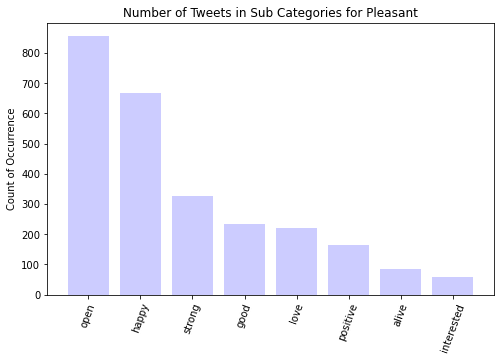

In [116]:
sub_name = list(pleasant_di_sorted.keys())
sub_count = list(pleasant_di_sorted.values())

plt.figure(figsize=(8,5))

plt.bar(range(len(pleasant_di)),sub_count,tick_label=sub_name, color='#CCCCFF')
plt.xticks(rotation = 70)
plt.ylabel('Count of Occurrence')
plt.title('Number of Tweets in Sub Categories for Pleasant')
plt.savefig('number_tweets_pleasant_sub.png', dpi=250);

In [117]:
#Subset for difficult sub_categories
difficult_sub_cats = twitter_tweets.loc[twitter_tweets['main_category'] == 'difficult']
difficult_sub_cats

id                created_at  \
1      1384122103918596098  2021-04-19T12:29:59.000Z   
4      1384122103863996422  2021-04-19T12:29:59.000Z   
12     1384122103733964802  2021-04-19T12:29:59.000Z   
13     1384122103725662217  2021-04-19T12:29:59.000Z   
18     1384122103637561345  2021-04-19T12:29:59.000Z   
...                    ...                       ...   
24943  1384121584286269443  2021-04-19T12:27:56.000Z   
24975  1384121583581548544  2021-04-19T12:27:55.000Z   
24992  1384121583325704197  2021-04-19T12:27:55.000Z   
24996  1384121583279644678  2021-04-19T12:27:55.000Z   
24998  1384121583241818115  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
1      ossai ayooyalowo was havingconversation withca...              0   
4      watching pms speech right now and honestly its...              2   
12     thank youwish this were posted at every place ...              0   
13     brendosyd sonicpauly youre soooo bad mr😂 hey p...              0   
18     roberthartley77 lost years of saving €87000 in...              0   
...                                                  ...            ...   
24943                        thoughts of dino head empty              0   
24975  ikisnickthinkwas ultimately hoping it to be so...              0   
24992  no one stayswith you permanentlyso learn to su...             54   
24996                                                                 1   
24998  adityarajkaulhope that other high courts of ma...              0   

       reply_count  like_count  quote_count        date      time  \
1                1           7            0  2021-04-19  12:29:59   
4                0           2            0  2021-04-19  12:29:59   
12               0           1            0  2021-04-19  12:29:59   
13               2           2            0  2021-04-19  12:29:59   
18               0           0            0  2021-04-19  12:29:59   
...            ...         ...          ...         ...       ...   
24943            1           4            0  2021-04-19  12:27:56   
24975            0           0            0  2021-04-19  12:27:55   
24992           37         152            2  2021-04-19  12:27:55   
24996            0           2            0  2021-04-19  12:27:55   
24998            0           0            0  2021-04-19  12:27:55   

              words  ...  confused_count helpless_count indifferent_count  \
1             alone  ...               0              1                 0   
4            forced  ...               0              1                 0   
12           scared  ...               0              0                 0   
13              bad  ...               0              0                 0   
18             lost  ...               1              0                 0   
...             ...  ...             ...            ...               ...   
24943         empty  ...               0              1                 0   
24975  disappointed  ...               0              0                 0   
24992         alone  ...               0              1                 0   
24996       hostile  ...               0              0                 0   
24998       useless  ...               0              1                 0   

       afraid_count  hurt_count  sad_count  neutral_count  pleasant_count  \
1                 0           0          0              0               0   
4                 0           0          0              0               0   
12                1           0          0              0               0   
13                0           0          0              0               0   
18                0           0          0              0               0   
...             ...         ...        ...            ...             ...   
24943             0           0          0              0               0   
24975             0           0          0              0               0   
249

In [118]:
difficult_di = {}
for i in difficult_sub_cats['sub_category']:
    if i in difficult_di.keys():
        difficult_di[i] += 1
    else:
        difficult_di[i] = 1
difficult_di

{'helpless': 191,
 'afraid': 103,
 'depressed': 324,
 'confused': 137,
 'sad': 26,
 'angry': 98,
 'hurt': 62,
 'indifferent': 65}

In [119]:
difficult_di_sorted = dict( sorted(difficult_di.items(),
                           key=lambda i: i[1],
                           reverse=True))

In [120]:
difficult_subs = pd.DataFrame(difficult_di, index=[0])
difficult_subs

helpless  afraid  depressed  confused  sad  angry  hurt  indifferent
0       191     103        324       137   26     98    62           65

In [121]:
difficult_subs = difficult_subs.T.reset_index()

In [122]:
difficult_subs

index    0
0     helpless  191
1       afraid  103
2    depressed  324
3     confused  137
4          sad   26
5        angry   98
6         hurt   62
7  indifferent   65

In [123]:
difficult_subs = difficult_subs.rename(columns = {'index': 'sub_category', 0:'count'})
difficult_subs.head()

sub_category  count
0     helpless    191
1       afraid    103
2    depressed    324
3     confused    137
4          sad     26

In [124]:
difficult_subs = difficult_subs.sort_values('count', ascending=False)
difficult_subs

sub_category  count
2    depressed    324
0     helpless    191
3     confused    137
1       afraid    103
5        angry     98
7  indifferent     65
6         hurt     62
4          sad     26

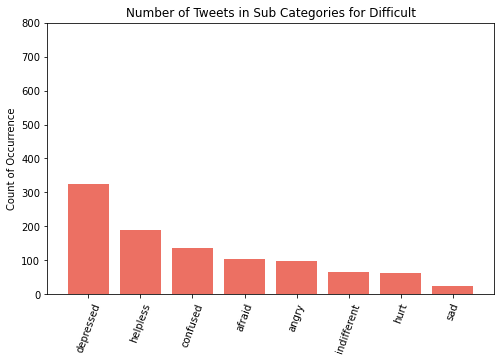

In [125]:
sub_name = list(difficult_di_sorted.keys())
sub_count = list(difficult_di_sorted.values())

plt.figure(figsize=(8,5))

plt.bar(range(len(difficult_di_sorted)),sub_count,tick_label=sub_name, color='#EC7063')
plt.xticks(rotation = 70)
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800])
plt.ylabel('Count of Occurrence')
plt.title('Number of Tweets in Sub Categories for Difficult')
plt.savefig('number_tweets_difficult_sub.png', dpi=250);

In [126]:
main_cat_di = {}
for i in twitter_tweets['main_category']:
    if i in main_cat_di.keys():
        main_cat_di[i] += 1
    else:
        main_cat_di[i] = 1
main_cat_di

{'neutral': 20936,
 'difficult': 1006,
 'multiple feelings': 455,
 'pleasant': 2613}

In [127]:
main_cat_di_sorted = dict( sorted(main_cat_di.items(),
                           key=lambda m: m[1],
                           reverse=True))

In [128]:
main_cat = pd.DataFrame(main_cat_di, index=[0])
main_cat

neutral  difficult  multiple feelings  pleasant
0    20936       1006                455      2613

In [129]:
main_cat = main_cat.T.reset_index()

In [130]:
main_cat

index      0
0            neutral  20936
1          difficult   1006
2  multiple feelings    455
3           pleasant   2613

In [131]:
main_cat = main_cat.rename(columns = {'index': 'main_category', 0:'count'})
main_cat

main_category  count
0            neutral  20936
1          difficult   1006
2  multiple feelings    455
3           pleasant   2613

In [132]:
main_cat = main_cat.sort_values('count', ascending=False)
main_cat

main_category  count
0            neutral  20936
3           pleasant   2613
1          difficult   1006
2  multiple feelings    455

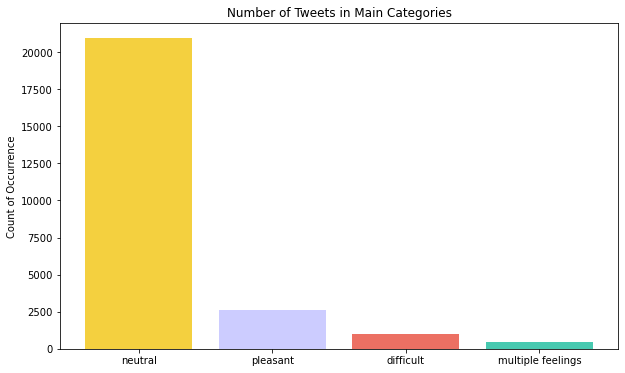

In [133]:
sub_name = list(main_cat_di_sorted.keys())
sub_count = list(main_cat_di_sorted.values())

plt.figure(figsize=(10,6))

plt.bar(range(len(main_cat_di_sorted)),sub_count,tick_label=sub_name, color=['#F4D03F', '#CCCCFF', '#EC7063', '#48C9B0'])
plt.ylabel('Count of Occurrence')
plt.title('Number of Tweets in Main Categories')
plt.savefig('number_tweets_main_cat.png', dpi=250);

In [134]:
main_cat['percent'] = (main_cat['count']/main_cat['count'].sum())*100

In [135]:
main_cat

main_category  count    percent
0            neutral  20936  83.710516
3           pleasant   2613  10.447821
1          difficult   1006   4.022391
2  multiple feelings    455   1.819272

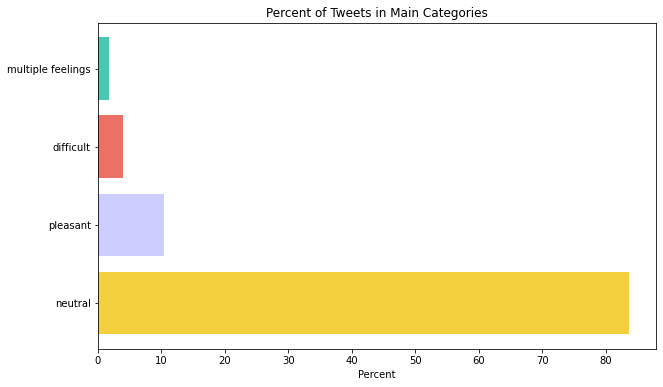

In [149]:
main_name = main_cat.main_category
main_percent = main_cat.percent

plt.figure(figsize=(10,6))

plt.barh(main_name,main_percent, color=['#F4D03F', '#CCCCFF', '#EC7063', '#48C9B0'])
plt.title('Percent of Tweets in Main Categories')
plt.xlabel('Percent')
plt.savefig('percent_tweets_main_cat.png', dpi=250);

### Looking at the average word count for Main Categories, Pleasant Sub Categories, and Difficult Sub Categories

First, Main Categories

In [137]:
avg_main_cat = twitter_tweets.groupby('main_category', as_index=False)['text_count'].mean()
avg_main_cat

main_category  text_count
0          difficult   28.220676
1  multiple feelings   33.632967
2            neutral   20.303974
3           pleasant   24.572139

In [138]:
avg_main_cat = avg_main_cat.rename(columns = {'text_count': 'avg_count'})
avg_main_cat

main_category  avg_count
0          difficult  28.220676
1  multiple feelings  33.632967
2            neutral  20.303974
3           pleasant  24.572139

In [139]:
avg_main_cat = avg_main_cat.sort_values('avg_count', ascending=False)
avg_main_cat

main_category  avg_count
1  multiple feelings  33.632967
0          difficult  28.220676
3           pleasant  24.572139
2            neutral  20.303974

Second, Pleasant Sub Categories

In [140]:
avg_pleasant_sub = pleasant_sub_cats.groupby('sub_category', as_index=False)['text_count'].mean()
avg_pleasant_sub

sub_category  text_count
0        alive   25.329412
1         good   26.585470
2        happy   23.599402
3   interested   32.508772
4         love   26.180995
5         open   22.056009
6     positive   25.975758
7       strong   28.363077

In [141]:
avg_pleasant_sub = avg_pleasant_sub.rename(columns = {'text_count': 'avg_count'})
avg_pleasant_sub

sub_category  avg_count
0        alive  25.329412
1         good  26.585470
2        happy  23.599402
3   interested  32.508772
4         love  26.180995
5         open  22.056009
6     positive  25.975758
7       strong  28.363077

In [142]:
avg_pleasant_sub = avg_pleasant_sub.sort_values('avg_count', ascending=False)
avg_pleasant_sub

sub_category  avg_count
3   interested  32.508772
7       strong  28.363077
1         good  26.585470
4         love  26.180995
6     positive  25.975758
0        alive  25.329412
2        happy  23.599402
5         open  22.056009

Third, Difficult Sub Categories

In [143]:
avg_difficult_sub = difficult_sub_cats.groupby('sub_category', as_index=False)['text_count'].mean()
avg_difficult_sub

sub_category  text_count
0       afraid   25.349515
1        angry   31.571429
2     confused   26.649635
3    depressed   27.895062
4     helpless   29.837696
5         hurt   30.080645
6  indifferent   25.738462
7          sad   29.192308

In [144]:
avg_difficult_sub = avg_difficult_sub.rename(columns = {'text_count': 'avg_count'})
avg_difficult_sub

sub_category  avg_count
0       afraid  25.349515
1        angry  31.571429
2     confused  26.649635
3    depressed  27.895062
4     helpless  29.837696
5         hurt  30.080645
6  indifferent  25.738462
7          sad  29.192308

In [145]:
avg_difficult_sub = avg_difficult_sub.sort_values('avg_count', ascending=False)
avg_difficult_sub

sub_category  avg_count
1        angry  31.571429
5         hurt  30.080645
4     helpless  29.837696
7          sad  29.192308
3    depressed  27.895062
2     confused  26.649635
6  indifferent  25.738462
0       afraid  25.349515

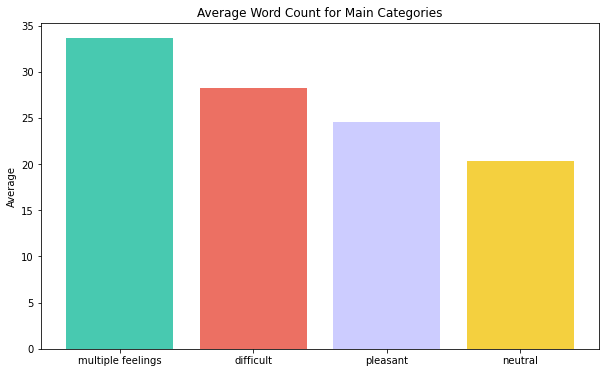

In [146]:
main_name = avg_main_cat.main_category
main_avg = avg_main_cat.avg_count

plt.figure(figsize=(10,6))

plt.bar(main_name,main_avg, color=['#48C9B0', '#EC7063', '#CCCCFF', '#F4D03F'])
plt.title('Average Word Count for Main Categories')
plt.ylabel('Average')
plt.savefig('avg_word_count_main.png', dpi=250);

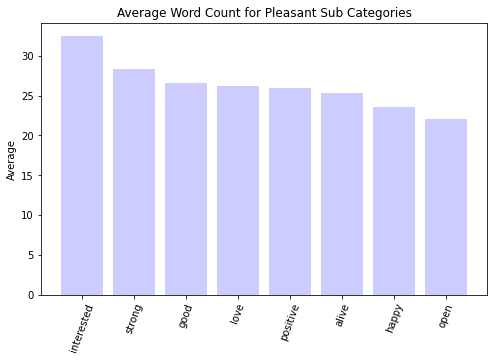

In [147]:
pleasant_sub_name = avg_pleasant_sub.sub_category
pleasant_sub_avg = avg_pleasant_sub.avg_count

plt.figure(figsize=(8,5))

plt.bar(pleasant_sub_name,pleasant_sub_avg, color=['#CCCCFF'])
plt.title('Average Word Count for Pleasant Sub Categories')
plt.xticks(rotation = 70)
plt.ylabel('Average')
plt.savefig('avg_word_count_pleasant_sub.png', dpi=250);

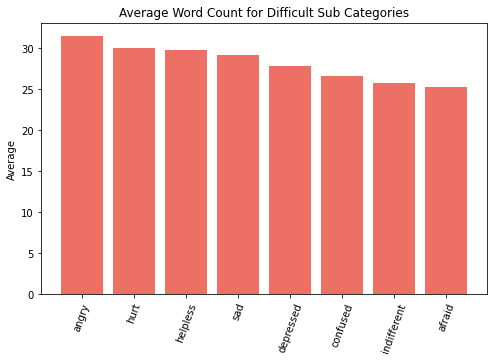

In [151]:
difficult_sub_name = avg_difficult_sub.sub_category
difficult_sub_avg = avg_difficult_sub.avg_count

plt.figure(figsize=(8,5))

plt.bar(difficult_sub_name,difficult_sub_avg, color=['#EC7063'])
plt.title('Average Word Count for Difficult Sub Categories')
plt.xticks(rotation = 70)
plt.ylabel('Average')
plt.savefig('avg_word_count_difficult_sub.png', dpi=250);

### Calculate the percentage between sub categories excluding neutral and multi-feeling

In [154]:
#Subset pleasant and difficult sub categories
pleasant_difficult_sub = twitter_tweets.loc[(twitter_tweets['sub_category'] != 'neutral') & (twitter_tweets['sub_category'] != 'multiple feelings')]
pleasant_difficult_sub

id                created_at  \
1      1384122103918596098  2021-04-19T12:29:59.000Z   
4      1384122103863996422  2021-04-19T12:29:59.000Z   
12     1384122103733964802  2021-04-19T12:29:59.000Z   
13     1384122103725662217  2021-04-19T12:29:59.000Z   
18     1384122103637561345  2021-04-19T12:29:59.000Z   
...                    ...                       ...   
24993  1384121583292149765  2021-04-19T12:27:55.000Z   
24996  1384121583279644678  2021-04-19T12:27:55.000Z   
24997  1384121583279607808  2021-04-19T12:27:55.000Z   
24998  1384121583241818115  2021-04-19T12:27:55.000Z   
25000  1384121583237689359  2021-04-19T12:27:55.000Z   

                                                    text  retweet_count  \
1      ossai ayooyalowo was havingconversation withca...              0   
4      watching pms speech right now and honestly its...              2   
12     thank youwish this were posted at every place ...              0   
13     brendosyd sonicpauly youre soooo bad mr😂 hey p...              0   
18     roberthartley77 lost years of saving €87000 in...              0   
...                                                  ...            ...   
24993  hope y’all ready to havegreat monday likeyammm...              0   
24996                                                                 1   
24997                                                                 2   
24998  adityarajkaulhope that other high courts of ma...              0   
25000  1/2 in the final masterclass we will be outlin...              0   

       reply_count  like_count  quote_count        date      time      words  \
1                1           7            0  2021-04-19  12:29:59      alone   
4                0           2            0  2021-04-19  12:29:59     forced   
12               0           1            0  2021-04-19  12:29:59     scared   
13               2           2            0  2021-04-19  12:29:59        bad   
18               0           0            0  2021-04-19  12:29:59       lost   
...            ...         ...          ...         ...       ...        ...   
24993            0           0            0  2021-04-19  12:27:55      great   
24996            0           2            0  2021-04-19  12:27:55    hostile   
24997            1           1            0  2021-04-19  12:27:55  important   
24998            0           0            0  2021-04-19  12:27:55    useless   
25000            1           1            0  2021-04-19  12:27:55      eager   

       ...  confused_count helpless_count indifferent_count  afraid_count  \
1      ...               0              1                 0             0   
4      ...               0              1                 0             0   
12     ...               0              0                 0             1   
13     ...               0              0                 0             0   
18     ...               1              0                 0             0   
...    ...             ...            ...               ...           ...   
24993  ...               0              0                 0             0   
24996  ...               0              0                 0             0   
24997  ...               0              0                 0             0   
24998  ...               0              1                 0             0   
25000  ...               0              0                 0             0   

       hurt_count  sad_count  neutral_count  pleasant_count  difficult_count  \
1               0          0              0               0                1   
4               0          0              0               0                1   
12              0          0              0               0                1   
13              0          0              0               0                1   
18              0          0              0               0                1   
...           ...        ...            ...             ...              ...   
2499

In [155]:
pleasant_diff_sub_d = {}
for s in pleasant_difficult_sub['sub_category']:
    if s in pleasant_diff_sub_d.keys():
        pleasant_diff_sub_d[s] += 1
    else:
        pleasant_diff_sub_d[s] = 1
pleasant_diff_sub_d

{'helpless': 191,
 'afraid': 103,
 'depressed': 324,
 'confused': 137,
 'open': 857,
 'strong': 325,
 'happy': 669,
 'positive': 165,
 'love': 221,
 'interested': 57,
 'good': 234,
 'sad': 26,
 'alive': 85,
 'angry': 98,
 'hurt': 62,
 'indifferent': 65}

In [156]:
sub_pleasant_diff = pd.DataFrame(pleasant_diff_sub_d, index=[0])
sub_pleasant_diff

helpless  afraid  depressed  confused  open  strong  happy  positive  love  \
0       191     103        324       137   857     325    669       165   221   

   interested  good  sad  alive  angry  hurt  indifferent  
0          57   234   26     85     98    62           65

In [157]:
sub_pleasant_diff = sub_pleasant_diff.T.reset_index()

In [158]:
sub_pleasant_diff

index    0
0      helpless  191
1        afraid  103
2     depressed  324
3      confused  137
4          open  857
5        strong  325
6         happy  669
7      positive  165
8          love  221
9    interested   57
10         good  234
11          sad   26
12        alive   85
13        angry   98
14         hurt   62
15  indifferent   65

In [159]:
sub_pleasant_diff = sub_pleasant_diff.rename(columns = {'index': 'sub_category', 0:'count'})
sub_pleasant_diff

sub_category  count
0      helpless    191
1        afraid    103
2     depressed    324
3      confused    137
4          open    857
5        strong    325
6         happy    669
7      positive    165
8          love    221
9    interested     57
10         good    234
11          sad     26
12        alive     85
13        angry     98
14         hurt     62
15  indifferent     65

In [160]:
sub_pleasant_diff['percent'] = (sub_pleasant_diff['count']/sub_pleasant_diff['count'].sum())*100

In [161]:
sub_pleasant_diff

sub_category  count    percent
0      helpless    191   5.277701
1        afraid    103   2.846090
2     depressed    324   8.952749
3      confused    137   3.785576
4          open    857  23.680575
5        strong    325   8.980381
6         happy    669  18.485770
7      positive    165   4.559271
8          love    221   6.106659
9    interested     57   1.575021
10         good    234   6.465875
11          sad     26   0.718431
12        alive     85   2.348715
13        angry     98   2.707930
14         hurt     62   1.713180
15  indifferent     65   1.796076

In [162]:
sub_pleasant_diff = sub_pleasant_diff.sort_values('percent', ascending=False)
sub_pleasant_diff

sub_category  count    percent
4          open    857  23.680575
6         happy    669  18.485770
5        strong    325   8.980381
2     depressed    324   8.952749
10         good    234   6.465875
8          love    221   6.106659
0      helpless    191   5.277701
7      positive    165   4.559271
3      confused    137   3.785576
1        afraid    103   2.846090
13        angry     98   2.707930
12        alive     85   2.348715
15  indifferent     65   1.796076
14         hurt     62   1.713180
9    interested     57   1.575021
11          sad     26   0.718431

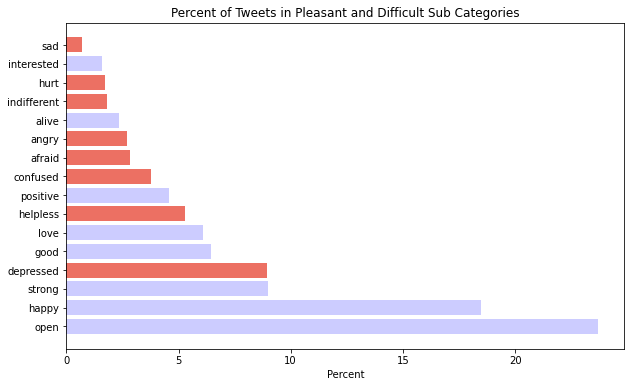

In [169]:
sub_name = sub_pleasant_diff.sub_category
sub_percent = sub_pleasant_diff.percent

plt.figure(figsize=(10,6))

plt.barh(sub_name,sub_percent, color=['#CCCCFF', '#CCCCFF', '#CCCCFF', '#EC7063','#CCCCFF','#CCCCFF','#EC7063','#CCCCFF','#EC7063','#EC7063','#EC7063','#CCCCFF','#EC7063','#EC7063','#CCCCFF','#EC7063'])
plt.title('Percent of Tweets in Pleasant and Difficult Sub Categories')
plt.xlabel('Percent')
plt.savefig('percent_tweets_sub_cat.png', dpi=250);